In [1]:
#!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

In [2]:
import numpy as np
import pandas as pd
import keras
import nltk
import time
import tensorflow_hub as hub
import tensorflow as tf
import fastai
from fastai import *
from fastai.text import * 

from sklearn import metrics

# Einlesen

Apple Sentiment

In [3]:
import string
import pandas as pd
import re

from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/datasets_652925_1154930_apple-twitter-sentiment-texts.csv")
df_train, df_test = train_test_split(data, test_size=0.33, random_state=42)

df_train.text = df_train.text.str.lower()
df_test.text = df_test.text.str.lower()

df_train.text = df_train.text.apply(lambda x:re.sub(r'http\S+', '', x))
df_test.text = df_test.text.apply(lambda x:re.sub(r'http\S+', '', x))

tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
df_train.text = df_train.text.apply(lambda x: tokenizer.tokenize(x))
df_test.text = df_test.text.apply(lambda x: tokenizer.tokenize(x))

df_train.text = df_train.text.apply(lambda x: ' '.join(x))
df_test.text = df_test.text.apply(lambda x: ' '.join(x))

df_train.text = df_train.text.map(lambda x : x.translate(str.maketrans('', '', string.punctuation)))
df_test.text = df_test.text.map(lambda x : x.translate(str.maketrans('', '', string.punctuation)))

df_train.text = df_train.text.str.replace("[0-9]", " ")
df_test.text = df_test.text.str.replace("[0-9]", " ")

df_train.text = df_train.text.str.strip(string.whitespace)
df_test.text = df_test.text.str.strip(string.whitespace)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train = pd.get_dummies(df_train, columns=["sentiment"])
df_test = pd.get_dummies(df_test, columns=["sentiment"])

epochs = 20
column_neg = 'sentiment_-1'
column_neu = 'sentiment_0'
column_pos = 'sentiment_1'

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [4]:
df_test

,text,sentiment_-1,sentiment_0,sentiment_1
0,strategic steps towards fulltime trading stock...,0,1,0
1,rt holiday giveaway to ensure you stay in tou...,0,1,0
2,elgato launches thunderbolt dock with k res...,0,1,0
3,yes rt no dont remind me tomorrow just ...,1,0,0
4,ubs says consensus on december quarter apple i...,0,1,0
...,...,...,...,...
533,short menu now live in the appstore,0,1,0
534,does anyone know if theres a smartwatch with a...,0,1,0
535,hey can i catch a fucking maverick of a wave o...,1,0,0
536,seems similar to or doing a cloud backup of my...,0,1,0


US Airline Sentiment

In [ ]:
import string
import pandas as pd
import re

from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/Tweets.csv")
data = data[['text', 'airline_sentiment']].copy()
df_train, df_test = train_test_split(data, test_size=0.33, random_state=42)

df_train.text = df_train.text.str.lower()
df_test.text = df_test.text.str.lower()


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#df_train.text = df_train.text.apply(lambda x: remove_emoji(x))
#df_test.text = df_test.text.apply(lambda x: remove_emoji(x))
df_train.text = df_train.text.apply(lambda x:re.sub(r'http\S+', '', x))
df_test.text = df_test.text.apply(lambda x:re.sub(r'http\S+', '', x))

tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
df_train.text = df_train.text.apply(lambda x: tokenizer.tokenize(x))
df_test.text = df_test.text.apply(lambda x: tokenizer.tokenize(x))

df_train.text = df_train.text.apply(lambda x: ' '.join(x))
df_test.text = df_test.text.apply(lambda x: ' '.join(x))

df_train.text = df_train.text.map(lambda x : x.translate(str.maketrans('', '', string.punctuation)))
df_test.text = df_test.text.map(lambda x : x.translate(str.maketrans('', '', string.punctuation)))

df_train.text = df_train.text.str.replace("[0-9]", " ")
df_test.text = df_test.text.str.replace("[0-9]", " ")

df_train.text = df_train.text.str.strip(string.whitespace)
df_test.text = df_test.text.str.strip(string.whitespace)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train = pd.get_dummies(df_train, columns=["airline_sentiment"])
df_test = pd.get_dummies(df_test, columns=["airline_sentiment"])

epochs = 10
column_neg = 'airline_sentiment_negative'
column_neu = 'airline_sentiment_neutral'
column_pos = 'airline_sentiment_positive'

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_train.shape

(9808, 4)

T4SA

In [ ]:
import string
import pandas as pd
import re

from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split

tweets = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/raw_tweets_text.csv")
sentiments = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/t4sa_text_sentiment.csv",delimiter = "\t")

tweets.set_index(tweets.id, inplace=True)
sentiments.set_index(sentiments.TWID, inplace=True)
data=tweets.join(sentiments)
data.dropna(inplace=True)
data.drop(columns=['id', 'TWID'], inplace=True)
data["sentiment"] = data[['NEU', 'NEG', 'POS']].idxmax(axis=1)

data = data[['text', 'sentiment']].copy()
df_train, df_test = train_test_split(data, test_size=0.33, random_state=42)

df_train.text = df_train.text.str.lower()
df_test.text = df_test.text.str.lower()


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#df_train.text = df_train.text.apply(lambda x: remove_emoji(x))
#df_test.text = df_test.text.apply(lambda x: remove_emoji(x))
df_train.text = df_train.text.apply(lambda x:re.sub(r'http\S+', '', x))
df_test.text = df_test.text.apply(lambda x:re.sub(r'http\S+', '', x))

tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
df_train.text = df_train.text.apply(lambda x: tokenizer.tokenize(x))
df_test.text = df_test.text.apply(lambda x: tokenizer.tokenize(x))

df_train.text = df_train.text.apply(lambda x: ' '.join(x))
df_test.text = df_test.text.apply(lambda x: ' '.join(x))

df_train.text = df_train.text.map(lambda x : x.translate(str.maketrans('', '', string.punctuation)))
df_test.text = df_test.text.map(lambda x : x.translate(str.maketrans('', '', string.punctuation)))

df_train.text = df_train.text.str.replace("[0-9]", " ")
df_test.text = df_test.text.str.replace("[0-9]", " ")

df_train.text = df_train.text.str.strip(string.whitespace)
df_test.text = df_test.text.str.strip(string.whitespace)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train = pd.get_dummies(df_train, columns=["sentiment"])
df_test = pd.get_dummies(df_test, columns=["sentiment"])

epochs = 5
column_neg = 'sentiment_NEG'
column_neu = 'sentiment_NEU'
column_pos = 'sentiment_POS'

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_test

,text,airline_sentiment_negative,airline_sentiment_neutral,airline_sentiment_positive
0,youre my early frontrunner for best airline o...,0,0,1
1,how is it that my flt to ewr was cancelled fli...,1,0,0
2,what is going on with your bdl to dca flights ...,1,0,0
3,do they have to depart from washington d c,0,1,0
4,i can probably find some of them are the tick...,1,0,0
...,...,...,...,...
4827,kudos to jetblue social media team for jumping...,0,0,1
4828,you cancelled flightled my flight back during ...,1,0,0
4829,needs to get it together in indy only ticke...,1,0,0
4830,done,0,1,0


# Verarbeitung

## Sprachmodell

In [5]:
data_lm = (TextList.from_df(df_train, "/content/drive/My Drive/Colab Notebooks/data/", cols='text')
                .split_by_rand_pct(0.1)
                .label_for_lm()
                .databunch(bs=32))

data_lm.save('tmp_lm')

In [6]:
learn = language_model_learner(data_lm, drop_mult=0.7, arch = AWD_LSTM, pretrained = True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


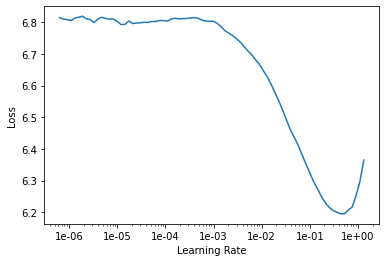

In [ ]:
%matplotlib inline
learn.lr_find()
learn.recorder.plot(skip_end=10)

In [7]:
# train the learner object with learning rate = 1e-2
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.995245,5.132594,0.220982,00:29


In [ ]:
learn.save('fit_head')

In [ ]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (964800 items)
x: LMTextList
xxbos btw i made muffins today,xxbos rain comes again,xxbos calll meee,xxbos with xxunk the best girl everr miley come to argentinaaa please,xxbos my friend just left i had fun tho
y: LMLabelList
,,,,
Path: /content/drive/My Drive/Colab Notebooks/data;

Valid: LabelList (107200 items)
x: LMTextList
xxbos yea the time gods can be cruel bastards sometimes,xxbos okay i m back in the game,xxbos and that was to some of you on twitter who read this even ones who follow me,xxbos very gloomy i hate it i want mr sun back,xxbos thankyou sweetie
y: LMLabelList
,,,,
Path: /content/drive/My Drive/Colab Notebooks/data;

Test: None, model=SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(57096, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(57096, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
     

In [8]:
learn.unfreeze()
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.291350,4.479108,0.249554,00:49
1,4.946142,4.187727,0.281250,00:48
2,4.714011,4.069477,0.283036,00:49
3,4.545219,4.018740,0.292411,00:49
4,4.426797,4.005661,0.290625,00:51


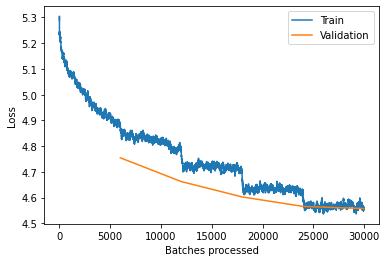

In [ ]:
learn.recorder.plot_losses()

In [9]:
learn.save('fine_tuned')
learn.save_encoder('ft_enc')

## Classifier

In [10]:
#data_lm = (TextList.from_df(df_train, "/content/drive/My Drive/Colab Notebooks/data/", cols='text')
                #.split_by_rand_pct(0.1)
                #.label_for_lm()
                #.databunch(bs=32))
#change for datasets!
data_clas = TextClasDataBunch.from_df("/content/drive/My Drive/Colab Notebooks/data/", train_df=df_train, valid_df=df_test,
                                  vocab=data_lm.vocab, 
                                  text_cols='text', 
                                  label_cols=[column_neg, column_neu, column_pos], 
                                  bs = 32)

In [11]:
data_clas.save('tmp_clas')

In [12]:
def precision(log_preds, targs, thresh=0.5, epsilon=1e-8):
    pred_pos = (log_preds > thresh).float()
    tpos = torch.mul((targs == pred_pos).float(), targs.float())
    return (tpos.sum()/(pred_pos.sum() + epsilon))#.item()

In [13]:
def recall(log_preds, targs, thresh=0.5, epsilon=1e-8):
    pred_pos = (log_preds > thresh).float()
    tpos = torch.mul((targs == pred_pos).float(), targs.float())
    return (tpos.sum()/(targs.sum() + epsilon))

In [14]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, arch = AWD_LSTM)
learn.metrics = [accuracy_thresh, precision, recall]
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1092 items)
x: TextList
xxbos we need more products like companies like need to xxunk the xxunk of xxunk xxunk,xxbos xxunk thought that was you in this xxunk,xxbos aapl rt xxunk xxunk xxunk his apple bit xxunk xxunk target of,xxbos here are the xxunk differences between apple xxunk and xxunk aapl goog,xxbos trade aapl free xxunk updates are xxunk here on twitter or you can xxunk the trade aapl free website here
y: MultiCategoryList
sentiment_0,sentiment_0,sentiment_0,sentiment_0,sentiment_0
Path: /content/drive/My Drive/Colab Notebooks/data;

Valid: LabelList (538 items)
x: TextList
xxbos xxunk xxunk xxunk xxunk trading stocks xxunk xxunk xxunk xxunk xxunk aapl xxunk fb xxunk xxunk,xxbos rt holiday xxunk to xxunk you stay in touch on the go xxunk out xxunk like,xxbos xxunk xxunk xxunk xxunk with xxunk xxunk support mac blog aapl,xxbos xxunk rt no do nt xxunk me xxunk just xxunk tell me what the updates you want to install actually a

In [15]:
learn.freeze()
learn.fit_one_cycle(1, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,precision,recall,time
0,0.525875,0.439935,0.810409,0.876652,0.317844,00:30


In [ ]:
learn.save('first_factors')

In [ ]:
learn.load('first_factors')

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7), wd=0.1)

epoch,train_loss,valid_loss,accuracy_thresh,precision,recall,time
0,0.146271,0.096017,0.965979,0.965204,0.925870,06:34
1,0.150970,0.098951,0.965674,0.964246,0.926148,06:40
2,0.134771,0.088001,0.969002,0.966517,0.935052,06:40
3,0.121099,0.076261,0.972710,0.970545,0.943393,06:46
4,0.098560,0.066108,0.976841,0.975520,0.951403,06:43


In [ ]:
learn.save('second_factors')

In [ ]:
learn.load('second_factors')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (790571 items)
x: TextList
xxbos for all who served and fought for our country we thank you salutetoservice veteransday,xxbos rt florida teen only fourth person in last years to survive xxunk amoeba infection,xxbos wireless digital lcd color baby monitor camera audio video ir night vision,xxbos found another one and i hope this is nt coming across as weird if it is sorry 😂,xxbos happy thanksgiving i m thankful you all ca nt draw
y: MultiCategoryList
sentiment_POS,sentiment_NEU,sentiment_NEU,sentiment_NEG,sentiment_POS
Path: /content/drive/My Drive/Colab Notebooks/data;

Valid: LabelList (389386 items)
x: TextList
xxbos fundraiser at the greene turtle football family fun,xxbos fantastic shot of two of our top talents in action tonight for ⚽ ️,xxbos all eyes are on elclasico but heres all the football on supersport,xxbos happy th birthday grandpa missing you more and more each day ❣,xxbos china july industrial profits rise buoyed by in

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7), wd=0.1)

epoch,train_loss,valid_loss,accuracy_thresh,precision,recall,time
0,0.079782,0.057009,0.980327,0.979592,0.957898,13:37
1,0.065651,0.045913,0.984490,0.983730,0.967487,13:44
2,0.051055,0.040907,0.986245,0.983778,0.973928,13:27
3,0.049266,0.038484,0.987007,0.985177,0.974655,13:51


# Auswertung

In [ ]:
# Predict on the test dataset
y_pred, y_true =  learn.get_preds()

In [ ]:
metrics.f1_score(y_true, y_pred>0.35, average='micro')

0.8257265554778787

In [ ]:
metrics.f1_score(y_true, y_pred>0.35, average=None)

array([0.957423, 0.985535, 0.98087 ])

In [ ]:
metrics.accuracy_score(y_true, y_pred>0.35)

0.9749117841935766